# Clustering Volcanoes According to Eruption Time

The 'eruptions.csv' file contains 10000 rows of volcanic activity information. The first column is the duration of the eruption, and the second is time between two eruptions. Clustering should be applied on the entire dataset. 

### Importing Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [2]:
df = pd.read_csv('eruptions.csv')
df.head()

,dur_eruptions,wait_time_btn_eruptions
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


## Question 1
### Plot a scatter of the two columns

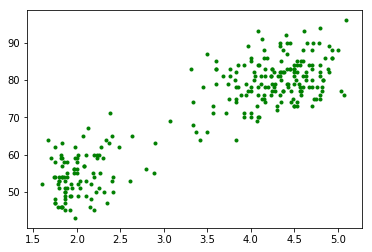

In [3]:
plt.figure()
plt.plot(df.dur_eruptions,df.wait_time_btn_eruptions,'g.')

## Question 2
### Run the K-Means algorithm on this dataset

In [4]:
kmeans=KMeans(n_clusters=2,init='random')
model=kmeans.fit(df)
y_kmeans=model.predict(df)
c=kmeans.cluster_centers_
print("Clusters are",c)
print(y_kmeans)

Clusters are [[ 2.09433    54.75      ]
 [ 4.29793023 80.28488372]]
[1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0
 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1
 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0
 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0
 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0
 1 1 1 0 1 0 0 1 1 0 1 0 1]


## Question 3
### Plot the output of K-Means, colored according to clusters and obtained centroids

Text(0,0.5,'wait time between eruptions')

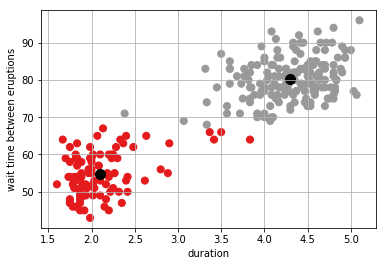

In [5]:
plt.scatter(df.dur_eruptions,df.wait_time_btn_eruptions,c=y_kmeans,s=50,cmap='Set1')
plt.grid()
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black',s=100)
plt.xlabel("duration")
plt.ylabel("wait time between eruptions")
#clusplot(y_kmeans, cluster, color=TRUE, shade=TRUE, labels=2, lines=0)

## Question 4
### Plot line from the centroid to the farthest point in the cluster

In [6]:
c0=c[0]
c1=c[1]
cluster1_p=df[y_kmeans==0]
cluster2_p=df[y_kmeans==1]
c1_d=cluster1_p.apply(lambda x:np.sqrt((x[0]-c0[0])**2+(x[1]-c0[1])**2),axis=1)
c2_d=cluster2_p.apply(lambda x:np.sqrt((x[0]-c1[0])**2+(x[1]-c1[1])**2),axis=1)
f_point1 = cluster1_p[c1_d.apply(lambda x: x == c1_d.max())]
f_point2 = cluster2_p[c2_d.apply(lambda x: x == c2_d.max())]
print(f_point1)
c1_d.max()

     dur_eruptions  wait_time_btn_eruptions
248          2.133                       67


12.250061035313282

[0, 60, 40, 100]

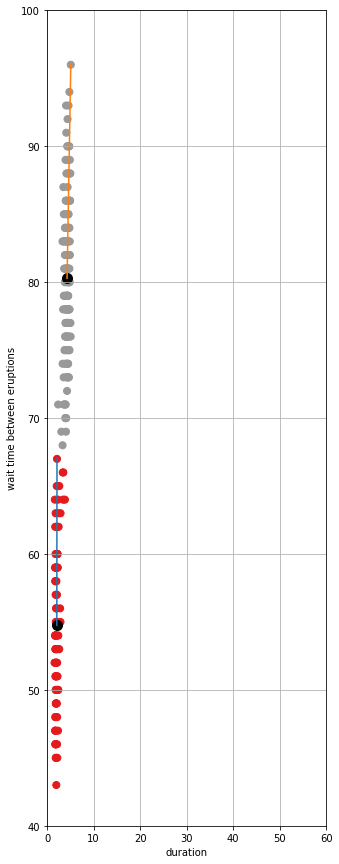

In [7]:
plt.figure(figsize=(5,15))
plt.scatter(df.dur_eruptions,df.wait_time_btn_eruptions,c=y_kmeans,s=50,cmap='Set1')
plt.grid()
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black',s=100)
plt.xlabel("duration")
plt.ylabel("wait time between eruptions")
plt.plot([c0[0],f_point1.dur_eruptions],[c0[1],f_point1.wait_time_btn_eruptions])
plt.plot([c1[0],f_point2.dur_eruptions],[c1[1],f_point2.wait_time_btn_eruptions])
plt.axis([0,60,40,100])

## Question 5
### Find out all the points in the cluster which have a distance greater than the mean of the cluster. Plot a graph showing them in different color

In [8]:
greater_avg_point1 = cluster1_p[c1_d.apply(lambda x: x > c1_d.mean())]
greater_avg_point2 = cluster2_p[c2_d.apply(lambda x: x > c2_d.mean())]

[0, 60, 40, 100]

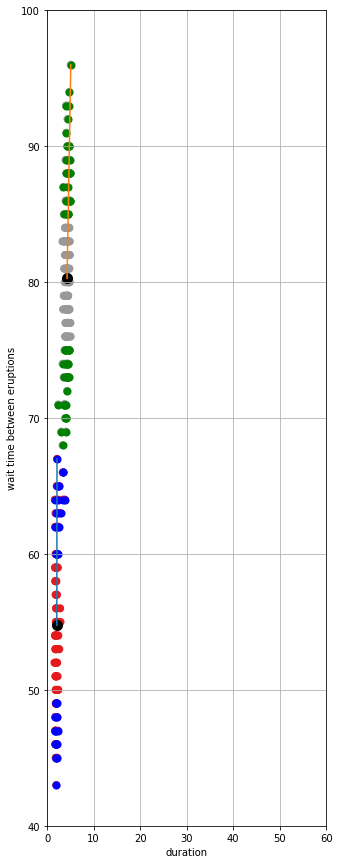

In [9]:
plt.figure(figsize=(5,15))
plt.scatter(df.dur_eruptions,df.wait_time_btn_eruptions,c=y_kmeans,s=50,cmap='Set1')
plt.grid()
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black',s=100)
plt.scatter(greater_avg_point1.dur_eruptions,greater_avg_point1.wait_time_btn_eruptions,c='blue',s=50)
plt.scatter(greater_avg_point2.dur_eruptions,greater_avg_point2.wait_time_btn_eruptions,c='green',s=50)
plt.xlabel("duration")
plt.ylabel("wait time between eruptions")
plt.plot([c0[0],f_point1.dur_eruptions],[c0[1],f_point1.wait_time_btn_eruptions])
plt.plot([c1[0],f_point2.dur_eruptions],[c1[1],f_point2.wait_time_btn_eruptions])
plt.axis([0,60,40,100])

## Question 6
### What is average distance of each cluster?

In [10]:
print("mean distance of cluster 1 points from centroid : ",c1_d.mean())
print("mean distance of cluster 2 points from centroid : ",c2_d.mean())

mean distance of cluster 1 points from centroid :  4.89907876317923
mean distance of cluster 2 points from centroid :  4.556493732778596


## Question 7
### Find out which cluster these points fall in?  
#### dur_eruptions = 2.5, 3.0, 3.2, 4.5, 5.0, 1.5  
#### wait_time_btn_eruptions = 70, 55, 70, 80, 70, 100  
### Plot these points in separate markers & color along with the clusters

In [11]:
new_df = pd.DataFrame(data={"dur_eruptions":[2.5, 3.0, 3.2, 4.5, 5.0, 1.5], 'wait_time_btn_eruptions':[70, 55, 70, 80, 70, 100]})
y_new_kmeans=model.predict(new_df)

In [12]:
y_new_kmeans

array([1, 0, 1, 1, 1, 1])

[0, 60, 40, 100]

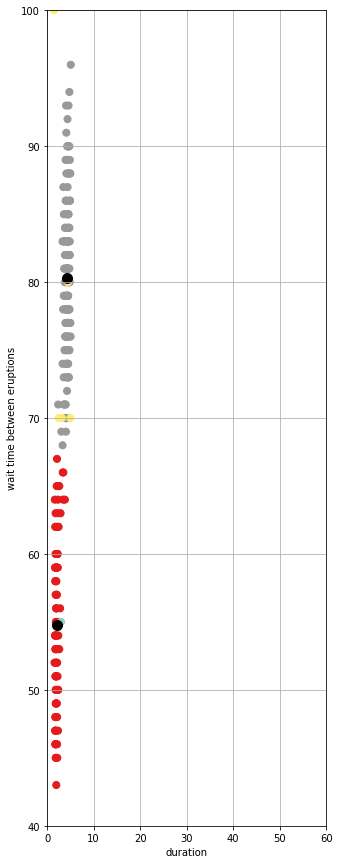

In [13]:
plt.figure(figsize=(5,15))
plt.scatter(df.dur_eruptions,df.wait_time_btn_eruptions,c=y_kmeans,s=50,cmap='Set1')
plt.scatter(new_df.dur_eruptions,new_df.wait_time_btn_eruptions,c=y_new_kmeans,s=50,cmap='Set3')
plt.grid()
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black',s=100)
plt.xlabel("duration")
plt.ylabel("wait time between eruptions")
#plt.plot([c0[0],f_point1.dur_eruptions],[c0[1],f_point1.wait_time_btn_eruptions])
#plt.plot([c1[0],f_point2.dur_eruptions],[c1[1],f_point2.wait_time_btn_eruptions])
plt.axis([0,60,40,100])